<a href="https://colab.research.google.com/github/kru123netizen/Projek-website-pinjol-team/blob/main/Analisis_data_pertemuan_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://docs.google.com/spreadsheets/d/1jncMUS0jzoqa9asOY_bEJCkLDehCmnUt6l5yhWthOp0/edit#gid=987563977

Seleksi Atribut


In [2]:
from pandas import DataFrame
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Kredit_ku - Kredit_ku.csv")
df.head(10)
print(df)


     Durasi Riwayat_kredit Tujuan  Jum_kredit  ... Masa_kerja Pekerjaan Jum_tanggungan  creditScore
0         6            A34    A43        1169  ...        A75      A173              1            1
1        48            A32    A43        5951  ...        A73      A173              1            2
2        12            A34    A46        2096  ...        A74      A172              2            1
3        42            A32    A42        7882  ...        A74      A173              2            1
4        24            A33    A40        4870  ...        A73      A173              2            2
..      ...            ...    ...         ...  ...        ...       ...            ...          ...
144      21            A34    A42        2288  ...        A72      A173              1            1
145      48            A31    A49        3566  ...        A74      A173              1            1
146       6            A34    A40         860  ...        A75      A173              1            1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Durasi          149 non-null    int64 
 1   Riwayat_kredit  149 non-null    object
 2   Tujuan          149 non-null    object
 3   Jum_kredit      149 non-null    int64 
 4   Savings         149 non-null    object
 5   Masa_kerja      149 non-null    object
 6   Pekerjaan       149 non-null    object
 7   Jum_tanggungan  149 non-null    int64 
 8   creditScore     149 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 10.6+ KB


In [4]:
df.creditScore.value_counts()

1    112
2     37
Name: creditScore, dtype: int64

In [5]:
df.Pekerjaan.value_counts()

A173    93
A172    30
A174    24
A171     2
Name: Pekerjaan, dtype: int64

In [6]:
df.Masa_kerja.value_counts()

A73    56
A75    41
A72    27
A74    21
A71     4
Name: Masa_kerja, dtype: int64

In [7]:
df.Jum_kredit.value_counts()

1295    2
2333    2
1169    1
2622    1
2337    1
       ..
1262    1
3378    1
2225    1
783     1
5371    1
Name: Jum_kredit, Length: 147, dtype: int64

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Durasi          149 non-null    int64 
 1   Riwayat_kredit  149 non-null    object
 2   Tujuan          149 non-null    object
 3   Jum_kredit      149 non-null    int64 
 4   Savings         149 non-null    object
 5   Masa_kerja      149 non-null    object
 6   Pekerjaan       149 non-null    object
 7   Jum_tanggungan  149 non-null    int64 
 8   creditScore     149 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 10.6+ KB


In [13]:
numerik_df = df.select_dtypes(include=['int64'])
numerik_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Durasi          149 non-null    int64
 1   Jum_kredit      149 non-null    int64
 2   Jum_tanggungan  149 non-null    int64
 3   creditScore     149 non-null    int64
dtypes: int64(4)
memory usage: 4.8 KB


In [14]:
numerik_index = numerik_df.columns
numerik_index

Index(['Durasi', 'Jum_kredit', 'Jum_tanggungan', 'creditScore'], dtype='object')

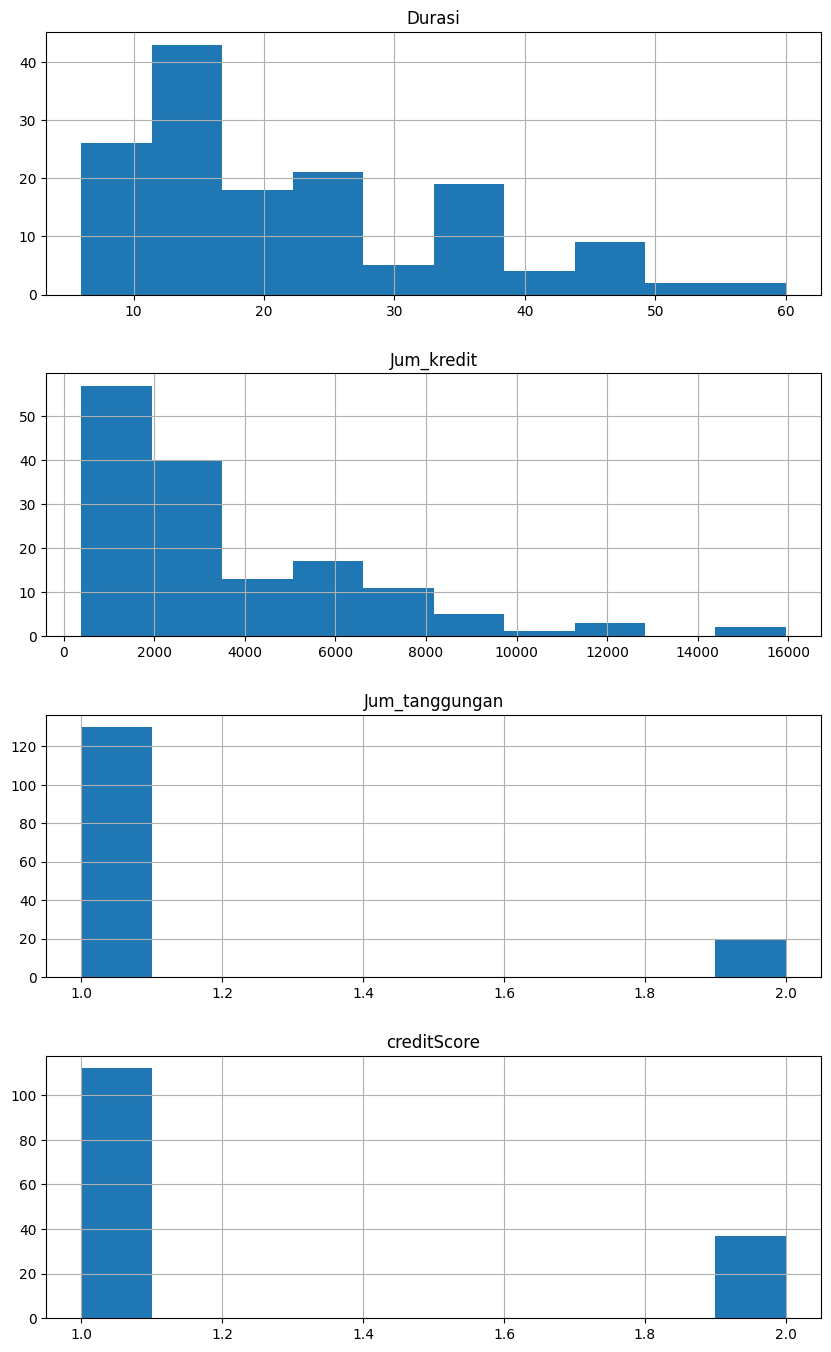

In [16]:
import matplotlib.pyplot as plt
df.hist(column=numerik_index, figsize=(10,30), layout=(7,1))
plt.show()

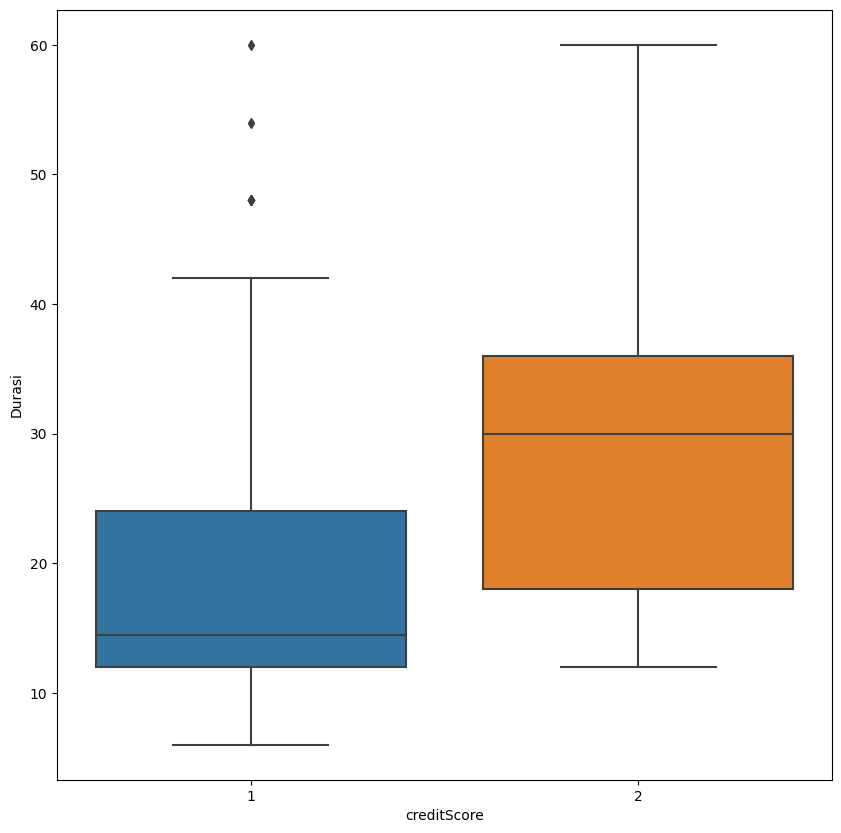

In [19]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="creditScore", y="Durasi", data=df)
plt.show()


In [20]:
df[['creditScore', 'Durasi']].groupby(['creditScore'], as_index=False).mean().sort_values(by='Durasi', ascending=False)

,creditScore,Durasi
1,2,29.918919
0,1,19.142857


In [22]:
df[['Jum_kredit', 'Masa_kerja']].groupby(['Jum_kredit'], as_index=False).mean().sort_values(by='Masa_kerja', ascending=False)


<ipython-input-22-3ced5cf15d20>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[['Jum_kredit', 'Masa_kerja']].groupby(['Jum_kredit'], as_index=False).mean().sort_values(by='Masa_kerja', ascending=False)


KeyError: ignored

In [23]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

df = df[(np.abs(stats.zscore(df['Durasi']))< 3)]

income_1 = df[df['creditScore']==1]['Durasi']
income_0 = df[df['creditScore']==2]['Durasi']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 10)

income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 10)

ttest, pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest", ttest)
print('p value', pval)

if pval <0.05:
  print("Ho ditolak")
else:
  print("Ho diterima")


ttest -1.7085724893158474
p value 0.10486358833371386
Ho diterima


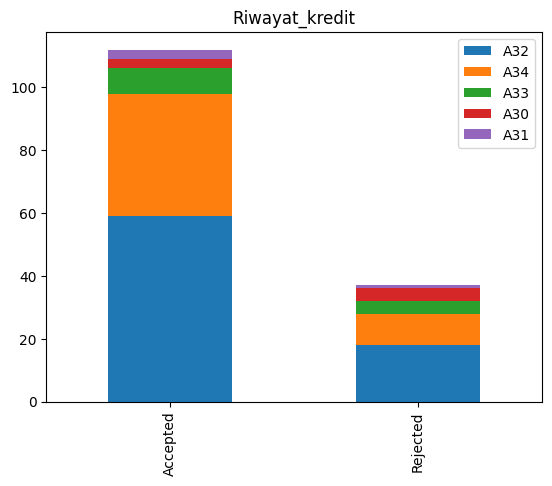

In [26]:
def bar_chart(feature):
  Accepted = df[df['creditScore']==1][feature].value_counts()
  Rejected = df[df['creditScore']==2][feature].value_counts()
  df1 = pd.DataFrame([Accepted, Rejected])
  df1.index = ['Accepted', 'Rejected']
  df1.plot(kind='bar', stacked=True, fig=(18,6), title=feature)

bar_chart('Riwayat_kredit')

In [27]:
c_t = pd.crosstab(df['Riwayat_kredit'], df['creditScore'], margins = False)
c_t

creditScore,1,2
Riwayat_kredit,,
A30,3,4
A31,3,1
A32,59,18
A33,8,4
A34,39,10


In [30]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)

print('p_value', p)
print(expected)

prob = 0.99
critical = chi2.ppf(prob, dof)
print('probabilitas=%.3f, critical=%.3f, stat=%.3f'  % (prob, critical, stat))
if abs(stat) >= critical:
  print('Dependent (tolak Ho)')
else:
  print('Independent (terima H0)')

dof=4
p_value 0.28925705168957533
[[ 5.26174497  1.73825503]
 [ 3.00671141  0.99328859]
 [57.87919463 19.12080537]
 [ 9.02013423  2.97986577]
 [36.83221477 12.16778523]]
probabilitas=0.990, critical=13.277, stat=4.981
Independent (terima H0)


<ipython-input-35-524aa483073f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


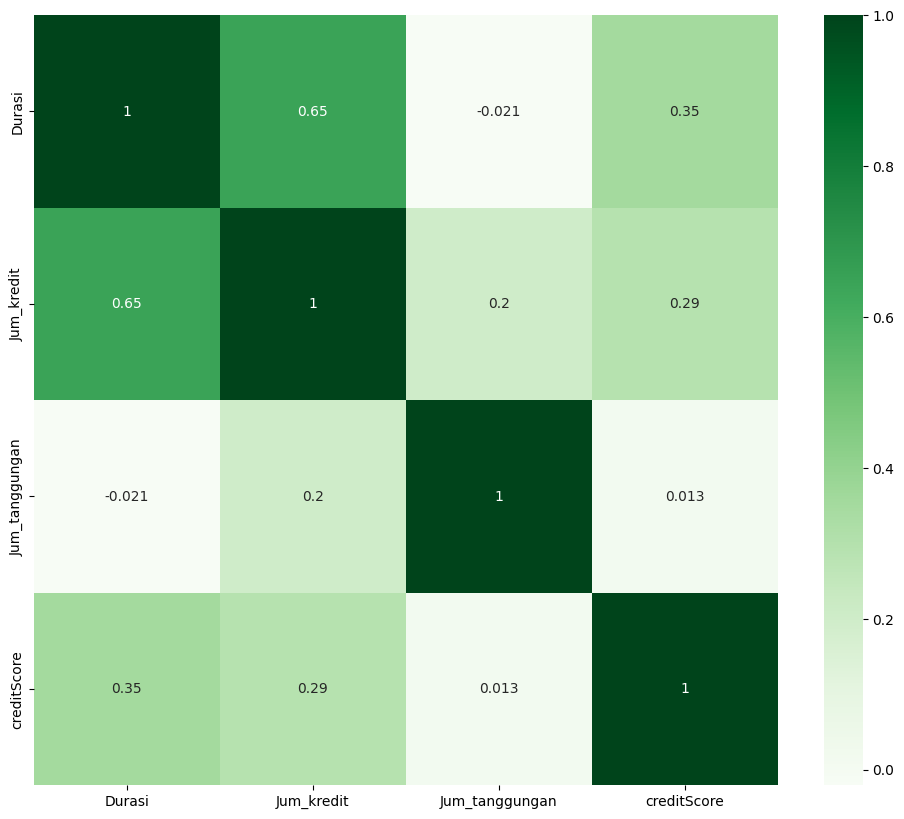

Durasi         0.353000
Jum_kredit     0.290965
creditScore    1.000000
Name: creditScore, dtype: float64

In [35]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

cor_target = abs(cor["creditScore"])

relevant_features = cor_target[cor_target>0.1]
relevant_features